# Testing SAM Model

In [8]:
#import cv2
!pip install customtkinter
!pip install segment-anything
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/n_/v62t5pf91cv588s9cqjq16dh0000gn/T/pip-req-build-fv_tx785
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/n_/v62t5pf91cv588s9cqjq16dh0000gn/T/pip-req-build-fv_tx785
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [9]:
import os
import matplotlib.pyplot as plt
import platform
import numpy as np
#import torch
import matplotlib.pyplot as plt
import cv2
import tkinter as tk
import customtkinter as ctk
import os
import sys
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

HOME = os.getcwd()
print("HOME:", HOME)


CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))


HOME: /Users/mattracz/Downloads/RadOnc/SAM_project
/Users/mattracz/Downloads/RadOnc/SAM_project/weights/sam_vit_h_4b8939.pth ; exist: True


(3024, 4032, 3)

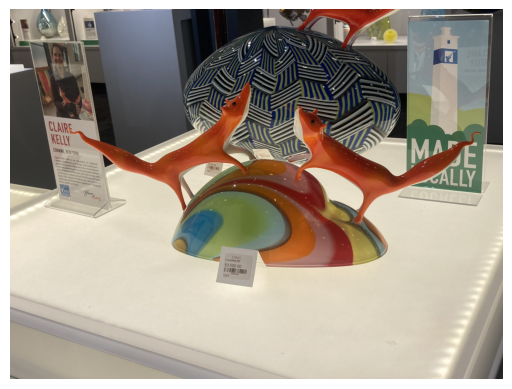

In [10]:
path = f'{HOME}/IMG_9928.jpeg'

assert path is not None, "No file selected"

image_bgr = cv2.imread(path)

assert image_bgr is not None, "No image selected"
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(image_rgb)

image_bgr.shape

#plt.imshow(image)

#if file doesnt exist error, say "file not found" else imshow

In [197]:
ctk.set_appearance_mode("Dark")
ctk.set_default_color_theme("blue")

class Wales(ctk.CTk):

    def delete_mask(self):
        pass

    def add_mask(self):
        pass
    
    def access_settings(self):
        settings_window = ctk.CTkToplevel(self)
        settings_window.title("Settings")
        settings_window.geometry("850x900")

        settings_tabs = ctk.CTkTabview(settings_window,
                                       width=850,
                                       height=900,
                                       corner_radius=15,
                                       fg_color="#b0b0b0",
                                       segmented_button_unselected_hover_color="#5B5B5B",
                                       segmented_button_unselected_color="#868686",
                                       segmented_button_selected_color="#0059ff",
                                       segmented_button_selected_hover_color="#0242ba",

                                       )
        settings_tabs.grid(pady=0)

        settings_tabs._segmented_button.configure(font=("Times New Roman", 27))

        save_controls_tab = settings_tabs.add("Controls")
        SAM_settings_tab = settings_tabs.add("SAM Settings")
                                        
        points_per_side_entrybox = ctk.CTkEntry(SAM_settings_tab,
                                     placeholder_text="Points per Side",
                                     height=50,
                                     width=130,
                                     font=("Times New Roman", 16),
                                     corner_radius=15,


                                     )
        points_per_side_entrybox.grid(padx=10)
        pps_label = ctk.CTkLabel(SAM_settings_tab, text="\nNumber of points on each side, considered by SAM Model. \nMore points increases accuracy and analyzing time.\n", font=("Times New Roman", 18), text_color="black")
        pps_label.grid(row=0, column=1, padx=20)

#
#
        pred_iou_thresh_entrybox = ctk.CTkEntry(SAM_settings_tab,
                                     placeholder_text="Predictive Filtering Threshold",
                                     height=50,
                                     width=230,
                                     font=("Times New Roman", 16),
                                     corner_radius=15,


                                     )
        pred_iou_thresh_entrybox.grid()
        pit_label = ctk.CTkLabel(SAM_settings_tab, text="\n0-1 scale, Filters masks based on accuracy.\n Higher filters are more selective, and take less time to analyze.\n", font=("Times New Roman", 18), text_color="black")
        pit_label.grid(row=1, column=1, padx=20)

#
#
        stability_score_thresh_entrybox = ctk.CTkEntry(SAM_settings_tab,
                                     placeholder_text="Stability Score Threshold",
                                     height=50,
                                     width=200,
                                     font=("Times New Roman", 16),
                                     corner_radius=15,


                                     )
        stability_score_thresh_entrybox.grid()
        sst_label = ctk.CTkLabel(SAM_settings_tab, text="\n0-1 scale, Filters masks based on how often they appear in all masks \n generated on an image. Higher filters are more selective, \nand take less time to analyze.\n", font=("Times New Roman", 18), text_color="black")
        sst_label.grid(row=2, column=1, padx=20)
#
#
        crop_n_layers_entrybox = ctk.CTkEntry(SAM_settings_tab,
                                     placeholder_text="Number of Layers",
                                     height=50,
                                     width=150,
                                     font=("Times New Roman", 16),
                                     corner_radius=15,


                                     )
        crop_n_layers_entrybox.grid()
        cnl_label = ctk.CTkLabel(SAM_settings_tab, text="\nNumber of additional layers of image that are analyzed, to compare any masks \nbetween layers. More layers catch more masks, and take longer to analyze.\n", font=("Times New Roman", 18), text_color="black")
        cnl_label.grid(row=3, column=1, padx=20)


        save_SAM_settings_button = ctk.CTkButton(SAM_settings_tab,
                                                 text="SAVE",
                                                 height=100,
                                                width=200,
                                                font=("Times New Roman", 50),
                                                text_color="black",
                                                fg_color="#32B3FF",
                                                hover_color="#0093FF",
                                                corner_radius = 20,
                                                command=self.save_SAM_settings

        )

        def save_SAM_settings(self):
            points_per_side=points_per_side_entrybox.get()
            pred_iou_thresh=pred_iou_thresh_entrybox.get()
            stability_score_thresh=stability_score_thresh_entrybox.get()
            crop_n_layers=crop_n_layers_entrybox.get()

        save_SAM_settings_button.grid(row=4, column=1, pady=100)

###############

        SAM_menu = ctk.CTkOptionMenu(SAM_settings_tab,
                                     values=["Small", "Medium", "Large"],
                                     height=70,
                                     width=220,
                                     font=("Times New Roman", 40),
                                     dropdown_font=("Times New Roman", 30),
                                     fg_color="#B8B8B8",
                                     corner_radius=10,
                                     button_color="#FF1514",
                                     button_hover_color="#C80800",
                                     text_color="black",
                                     dropdown_text_color="black",
                                     dropdown_hover_color="#959595",
                                     dropdown_fg_color="#B8B8B8",

        )

        SAM_menu.grid(row=4)

#################

    def __init__(self):
        super().__init__()

        def show_anns(anns):
            if len(anns) == 0:
                return
            sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
            ax = plt.gca()
            ax.set_autoscale_on(False)

            img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
            img[:,:,3] = 0
            for ann in sorted_anns:
                m = ann['segmentation']
                color_mask = np.concatenate([np.random.random(3), [.35]])
                img[m] = color_mask
            ax.imshow(img)

            plt.figure(figsize=(20,20))
            plt.axis('off')
            plt.imshow(image_rgb)
            plt.show() 

        def run_SAM(self):

            sys.path.append("..")

            sam_checkpoint = "sam_vit_h_4b8939.pth"
            model_type = "vit_h"

            device = "cuda"

            sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
            sam.to(device=device)

            mask_generator_ = SamAutomaticMaskGenerator(model=sam)
            masks = mask_generator.generate(image_bgr)
            show_anns(masks)

        self.title("WALES")
        self.geometry("1500x1000")


        self.delete_mask_button = ctk.CTkButton(self, 
                                                text="Delete Mask",
                                                height=90,
                                                width=350,
                                                font=("Times New Roman", 55),
                                                text_color="black",
                                                fg_color="red",
                                                hover_color="#ba0202",
                                                corner_radius = 15,
                                                command=self.delete_mask

                                                )
        
        self.add_mask_button = ctk.CTkButton(self, 
                                                text="Add Mask",
                                                height=90,
                                                width=350,
                                                font=("Times New Roman", 55),
                                                text_color="black",
                                                fg_color="#04ff00",
                                                hover_color="#07c404",
                                                corner_radius = 15,
                                                command=self.add_mask

                                                )
        
        self.settings_button = ctk.CTkButton(self, 
                                                text="Settings",
                                                height=50,
                                                width=175,
                                                font=("Times New Roman", 35),
                                                text_color="white",
                                                fg_color="#a6a6a6",
                                                hover_color="#6b6b6b",
                                                corner_radius = 15,
                                                command=self.access_settings,
                                                

                                                )
        
        self.run_SAM_button = ctk.CTkButton(self,
                                            text="RUN SAM",
                                            height=70,
                                            width=300,
                                            font=("Times New Roman", 55),
                                            text_color="black",
                                            fg_color="#45C300",
                                            hover_color="#319000",
                                            corner_radius = 15,
                                            command=self.run_SAM

         )

        self.add_mask_button.grid(row=0, column=0, padx=100, pady=30)
        self.delete_mask_button.grid(row=0, column=1, padx=150)
        self.settings_button.grid(row=0, column=2)
        self.run_SAM_button.grid(row=1, column=2, pady=100)



wales = Wales()
wales.mainloop()

(np.float64(-0.5), np.float64(4031.5), np.float64(3023.5), np.float64(-0.5))

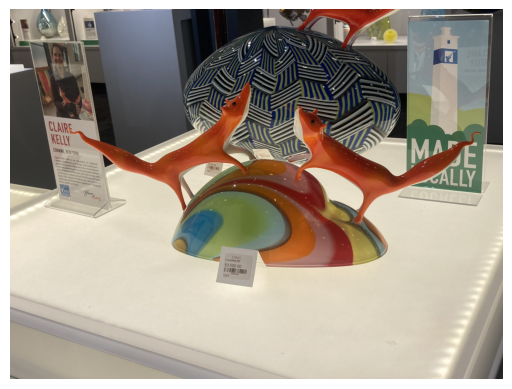

In [12]:
plt.figure() #figsize=(20, 20)
plt.imshow(image_rgb)
plt.plot()
plt.axis('off')

NameError: name 'masks' is not defined

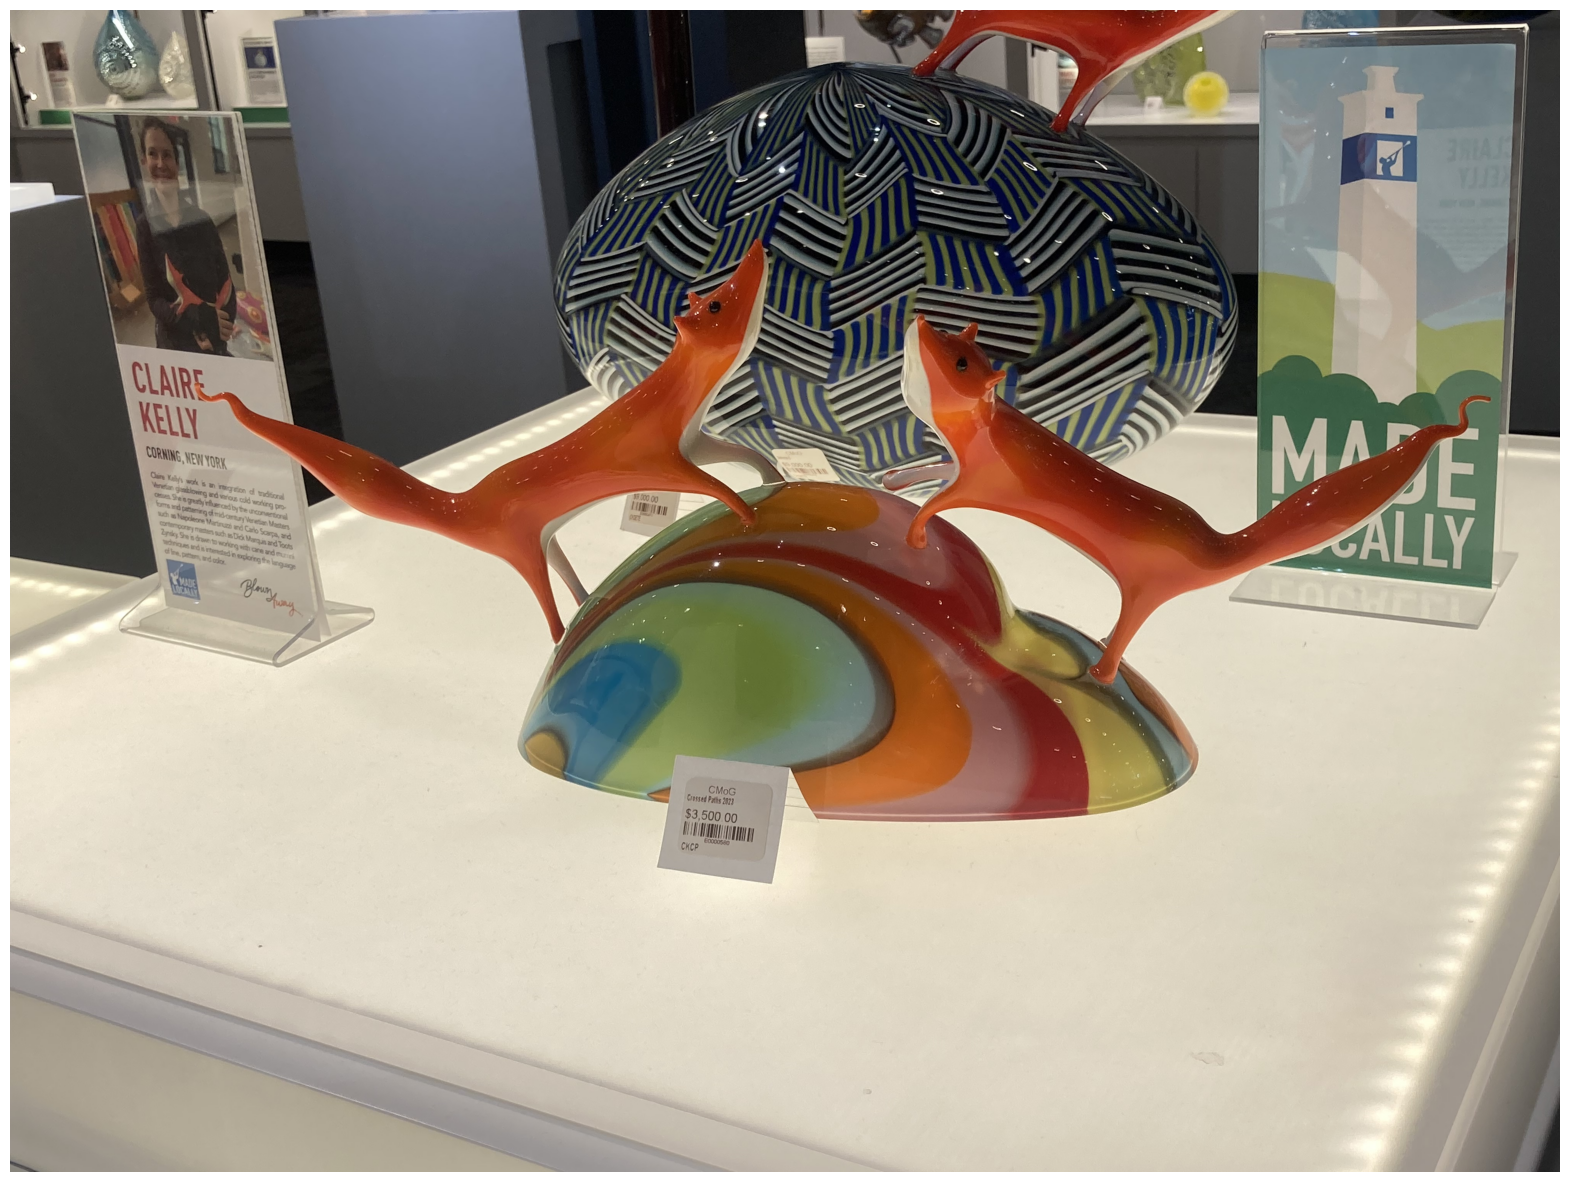

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_rgb)
show_anns(masks)
plt.show() 